In [ ]:
!pip install numpy pandas seaborn matplotlib scikit-learn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [4]:
df = pd.read_csv('Dataset/diabetes.csv')
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
416,1,97,68,21,0,27.2,1.095,22,0
168,4,110,66,0,0,31.9,0.471,29,0
372,0,84,64,22,66,35.8,0.545,21,0
542,10,90,85,32,0,34.9,0.825,56,1
122,2,107,74,30,100,33.6,0.404,23,0


In [5]:
x = df.drop(columns='Outcome',axis=1)
y = df['Outcome']
y.groupby(y).count()
# 0 = No Diabetes, 1 = Diabetes


Outcome
0    500
1    268
Name: Outcome, dtype: int64

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Accuracy on training data: 1.0
Accuracy on test data: 0.7207792207792207
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



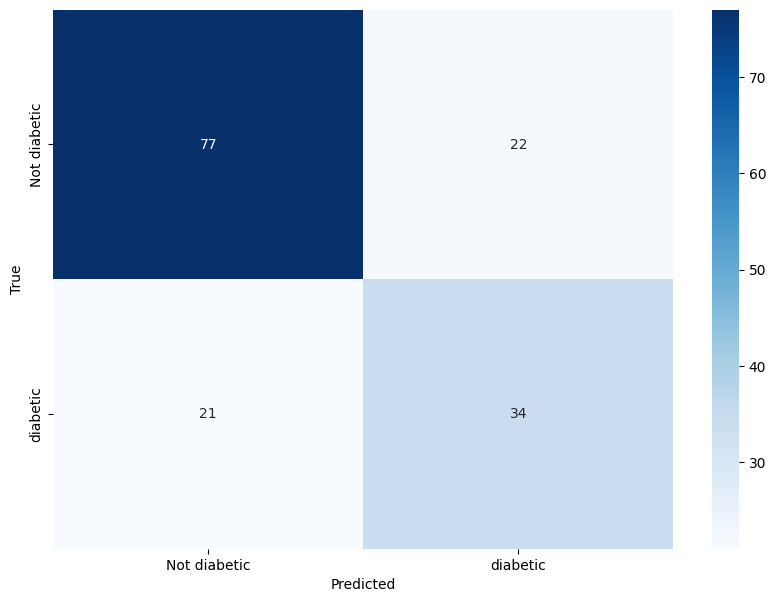

In [8]:
# Model 1 : Random Forest Classifier
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
print(f"Accuracy on training data: {accuracy_score(y_train,y_train_pred)}")
print(f"Accuracy on test data: {accuracy_score(y_test,y_test_pred)}")
print(classification_report(y_test,y_test_pred))
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Not diabetic', 'diabetic'], yticklabels=['Not diabetic', 'diabetic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy on training data: 0.7703583061889251
Accuracy on test data: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



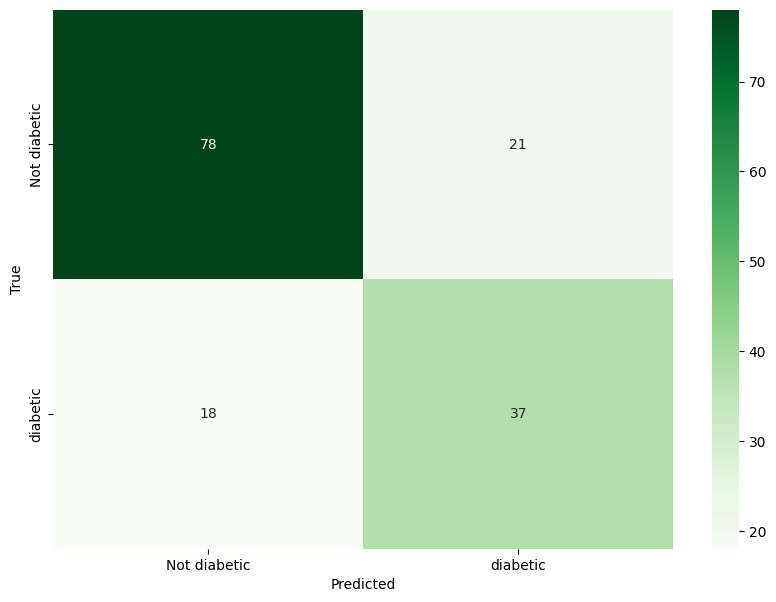

In [36]:
# Model 2 : Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
print(f"Accuracy on training data: {accuracy_score(y_train,y_train_pred)}")
print(f"Accuracy on test data: {accuracy_score(y_test,y_test_pred)}")
print(classification_report(y_test,y_test_pred))
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d',cmap='Greens',xticklabels=['Not diabetic', 'diabetic'], yticklabels=['Not diabetic', 'diabetic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy on training data: 0.6042345276872965
Accuracy on test data: 0.6623376623376623
              precision    recall  f1-score   support

           0       0.73      0.75      0.74        99
           1       0.53      0.51      0.52        55

    accuracy                           0.66       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.66      0.66      0.66       154



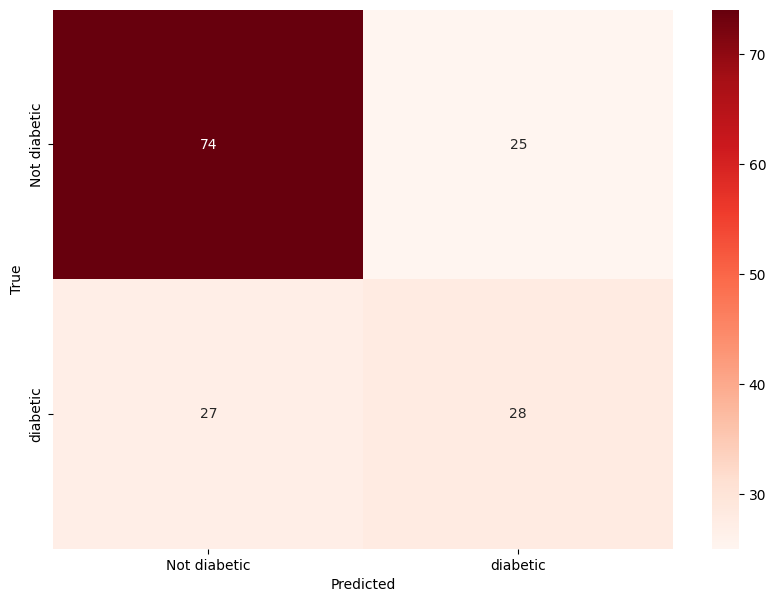

In [37]:
# Model 3 : Naive Bayes
model = MultinomialNB()
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
print(f"Accuracy on training data: {accuracy_score(y_train,y_train_pred)}")
print(f"Accuracy on test data: {accuracy_score(y_test,y_test_pred)}")
print(classification_report(y_test,y_test_pred))
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d',cmap='Reds',xticklabels=['Not diabetic', 'diabetic'], yticklabels=['Not diabetic', 'diabetic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy on training data: 0.7719869706840391
Accuracy on test data: 0.7597402597402597
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



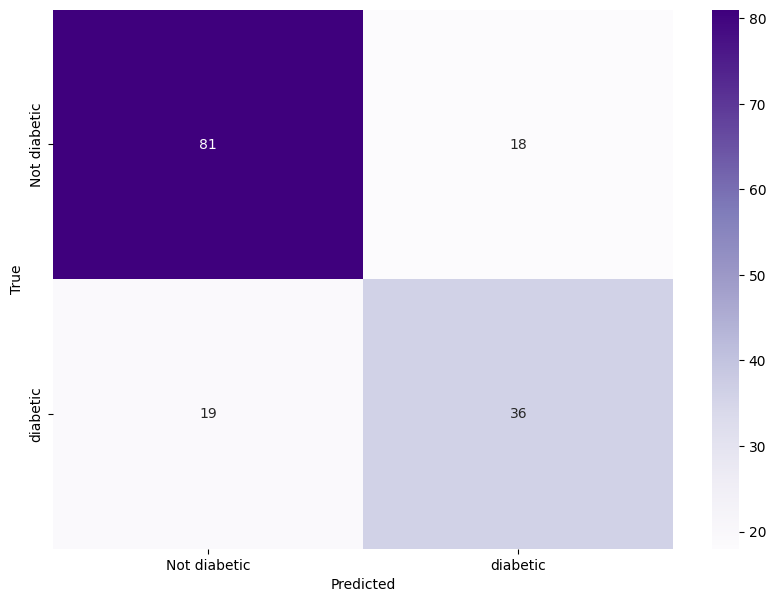

In [38]:
# Model 4 : Support Vector Classifier
sd = StandardScaler()
sd.fit(x)
standar_x = sd.transform(x)

X = standar_x
Y = y

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
model = SVC(kernel='linear')
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
print(f"Accuracy on training data: {accuracy_score(y_train,y_train_pred)}")
print(f"Accuracy on test data: {accuracy_score(y_test,y_test_pred)}")
print(classification_report(y_test,y_test_pred))
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d',cmap='Purples',xticklabels=['Not diabetic', 'diabetic'], yticklabels=['Not diabetic', 'diabetic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy on training data: 1.0
Accuracy on test data: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



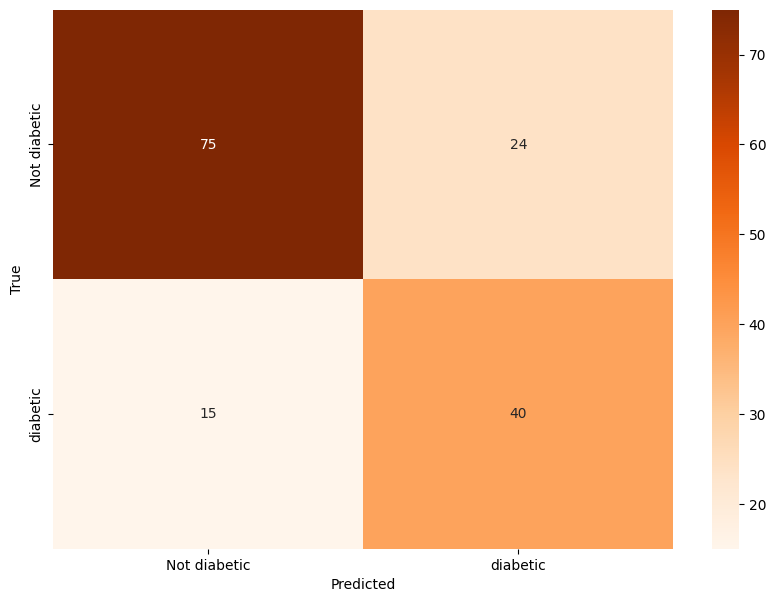

In [39]:
# Model 5 : Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
print(f"Accuracy on training data: {accuracy_score(y_train,y_train_pred)}")
print(f"Accuracy on test data: {accuracy_score(y_test,y_test_pred)}")
print(classification_report(y_test,y_test_pred))
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d',cmap='Oranges',xticklabels=['Not diabetic', 'diabetic'], yticklabels=['Not diabetic', 'diabetic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()